Notes:

00012-CHW1, 00012-CS1 & 00044-CS1: 

Server restarts on these exports causes a momentary read of 0. Please disregard.  

00044-CHW1: 
Data loss 6/6/23 – 7/16/23 due to system upgrade.


00012: Noyes' Building
00044: English Building

chw: chilled water
cs: steam
e: electricity

In [81]:
import pandas as pd
df = pd.read_csv("data/00012-CHW1 2023 Hourly Usage(ednC010).csv")

df

,Date,UOFI.BACNET.Device_545545.Analog Value_13
0,1/1/2023 12:00:00 AM,70131.12500
1,1/1/2023 1:00:00 AM,70131.12500
2,1/1/2023 2:00:00 AM,70131.12500
3,1/1/2023 3:00:00 AM,70131.12500
4,1/1/2023 4:00:00 AM,70131.12500
...,...,...
8756,12/31/2023 8:00:00 PM,74982.80469
8757,12/31/2023 9:00:00 PM,74982.80469
8758,12/31/2023 10:00:00 PM,74982.80469
8759,12/31/2023 11:00:00 PM,74982.80469


In [82]:
df['Date'] = pd.to_datetime(df['Date'], format=' %m/%d/%Y %I:%M:%S %p')
df

,Date,UOFI.BACNET.Device_545545.Analog Value_13
0,2023-01-01 00:00:00,70131.12500
1,2023-01-01 01:00:00,70131.12500
2,2023-01-01 02:00:00,70131.12500
3,2023-01-01 03:00:00,70131.12500
4,2023-01-01 04:00:00,70131.12500
...,...,...
8756,2023-12-31 20:00:00,74982.80469
8757,2023-12-31 21:00:00,74982.80469
8758,2023-12-31 22:00:00,74982.80469
8759,2023-12-31 23:00:00,74982.80469


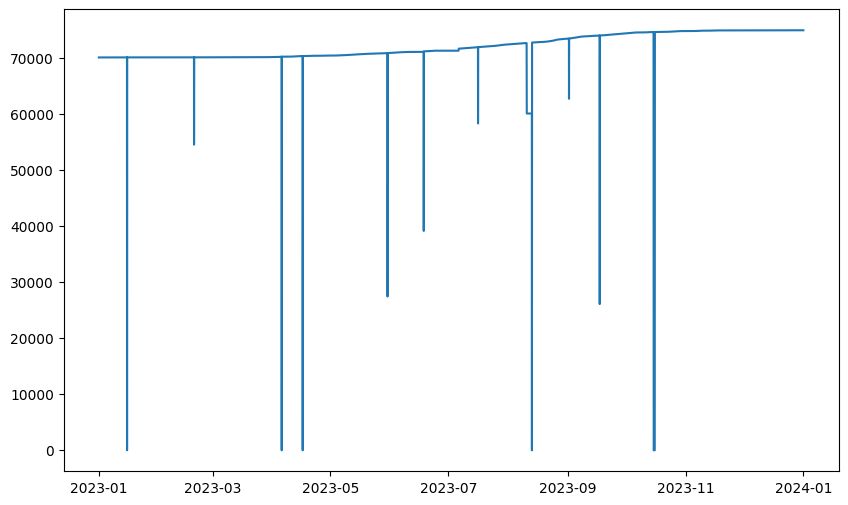

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Optional: adjust the size of the plot
plt.plot(df['Date'], df['UOFI.BACNET.Device_545545.Analog Value_13'], label='Power Usage')

Let's discard the 0 values

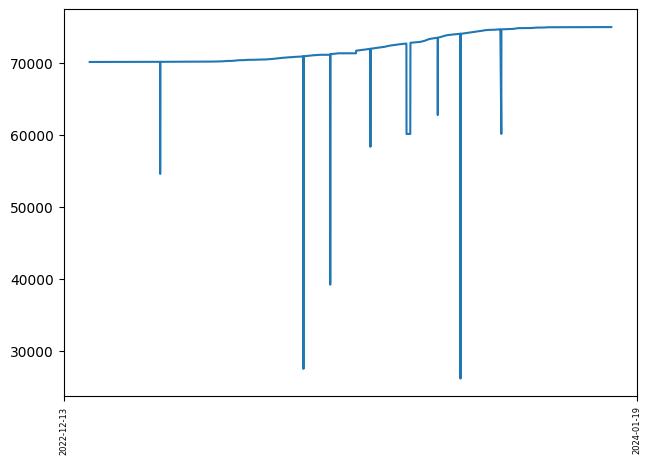

In [84]:
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator


colName = "UOFI.BACNET.Device_545545.Analog Value_13"

df = df[df[colName] != 0]

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=24080))  # Set ticks every 6 hours


plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()

# plt.plot(df['Date'], df['UOFI.BACNET.Device_545545.Analog Value_13'].pct_change() * 100, label='Power Usage')
# plt.plot(df['Date'], df['UOFI.BACNET.Device_545545.Analog Value_13'], label='Power Usage')

plt.plot(df['Date'], df[colName], label='Power Usage')

Let's discard the outliers in the data!!!

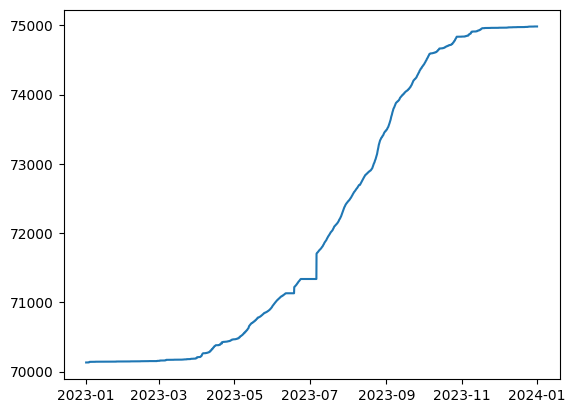

In [85]:


Q1 = df[colName].quantile(0.25)
Q3 = df[colName].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df[colName] >= lower_bound) & (df[colName] <= upper_bound)]
plt.plot(df['Date'], df[colName], label='Power Usage')

Find difference in sensor value, rather than cumulative sensor value

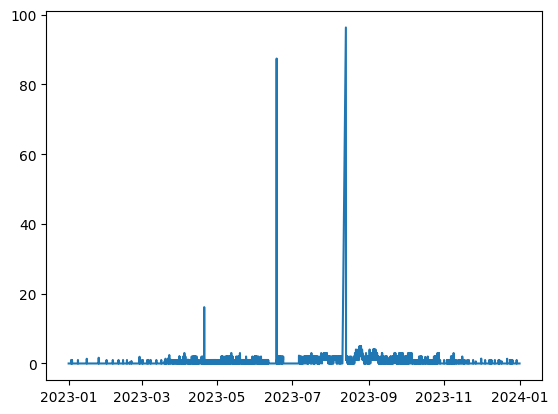

In [86]:
df[colName] = df[colName] - df[colName].shift(1)

df[colName] = df[colName].fillna(0)


Q1 = df[colName].quantile(0.25)
Q3 = df[colName].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[df[colName] < 300]

plt.plot(df['Date'], df[colName], label='Power Usage')

Smooth the graph

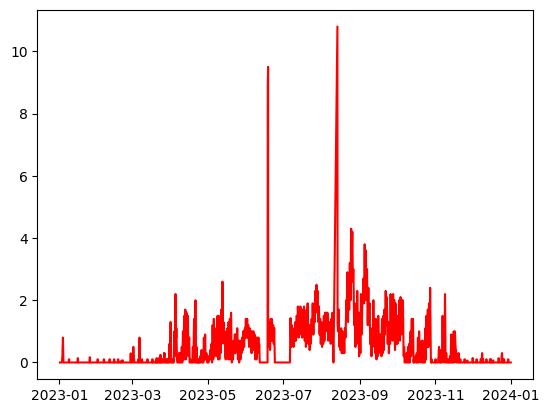

In [88]:
window_size = 10
df['sensor_val_smooth'] = df[colName].rolling(window=window_size).mean()

plt.plot(df['Date'], df['sensor_val_smooth'], label='Smoothed', color='red')


For a particular time range

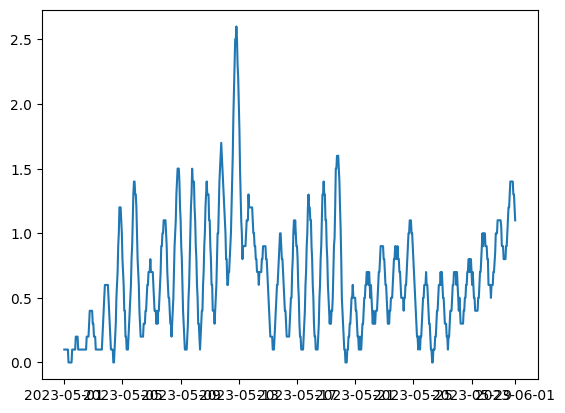

In [89]:
start_time = '2023-05-01 00:00:00'
end_time = '2023-06-01 00:00:00'

filtered_df = df[(df['Date'] >= start_time) & (df['Date'] <= end_time)]

plt.plot(filtered_df['Date'], filtered_df["sensor_val_smooth"], label='Filtered Data')


In [1]:
def get_dataset_df(filename, delZero=False):
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df['Date'], format=' %m/%d/%Y %I:%M:%S %p')

    if delZero:
        second_column_name = df.columns[1]
        df = df[df[second_column_name] != 0]
    
    return df

noyes_chw = get_dataset_df("data/00012-CHW1 2023 Hourly Usage(ednC010).csv", delZero=True)
noyes_steam = get_dataset_df("data/00012-CHW1 2023 Hourly Usage(ednC010).csv", delZero=True)
noyes_electricity1 = get_dataset_df("data/00012-E4 2023 Hourly Usage(ednAF22).csv", delZero=True)
noyes_electricity2 = get_dataset_df("data/00012-E5 2023 Hourly Usage(ednA006).csv", delZero=True)


english_chw = get_dataset_df("data/00044-CHW1 2023 Hourly Usage(edn16DD).csv", delZero=True)
english_steam = get_dataset_df("data/00044-CS1 2023 Hourly Usage(edn9D70).csv", delZero=True)
english_electricity = get_dataset_df("data/00044-E3 2023 Hourly Usage(ednCF11).csv", delZero=True)

def plot_df(df):
    plt.figure(figsize=(10, 6))  # Optional: adjust the size of the plot
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=248))  # Set ticks every 248 hours


    plt.xticks(rotation=90, fontsize=6)
    plt.tight_layout()

    second_column_name = df.columns[1]

    plt.plot(df['Date'], df[second_column_name], label='Power Usage')

plot_df(noyes_electricity1)
# plot_df(chw1_df)

NameError: name 'pd' is not defined